### Linear Regressions

> Linear regression is a supervised machine-learning algorithm.
> ...
> Supervised machine-learning algorithms learn from the labeled datasets and map the data points to the most optimized linear functions.
> ...
> Regression predicts the continuous output variables based on the independent input variable.
> Example: the prediction of house prices based on different parameters like house age, distance from the main road, location, area, etc.

https://www.geeksforgeeks.org/ml-linear-regression/

> A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term), as shown in Equation 4-1.

hands-on-machine-learning

Example: 
```
life_satisfaction = θ0 + θ1 × GDP_per_capita
This model is just a linear function of the input feature GDP_per_capita. θ0 and θ1 are the model’s parameters.
```

> The most common performance measure of a regression model is the root mean square error.

hands-on-machine-learning

> What Is Cost Function of Linear Regression?
> Cost function measures the performance of a machine learning model for a data set.
> Cost function quantifies the error between predicted and expected values and presents that error in the form of a single real number.

https://builtin.com/machine-learning/cost-function


#### Video References
- [What is Linear Regression in Machine Learning ? Understand with Examples!](https://www.youtube.com/watch?v=nwD5U2WxTdk)

> MSE measures the average squared difference between an observation’s actual and predicted values. The output is a single number representing the cost, or score, associated with our current set of weights. Our goal is to minimize MSE to improve the accuracy of our model.

https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#:~:text=Cost%20function,-The%20prediction%20function&text=MSE%20measures%20the%20average%20squared,the%20accuracy%20of%20our%20model.

> To find the value of θ that minimizes the MSE, there exists a closed-form solution—in other words, a mathematical equation that gives the result directly. This is called the Normal equation.

In [3]:
import numpy as np

np.random.seed(42) # make the code reproducible
"""
older syntax ?  - Numpy now recommends using a dedicated Generator instance
See: https://numpy.org/doc/2.0/reference/random/generated/numpy.random.seed.html

use case: https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do
With the seed reset (every time), the same set of numbers will appear every time.
If the random seed is not reset, different numbers appear with every invocation:

"Setting the seed for reproduce work" means to initialize a random number generator
with a specific value, ensuring that whenever you run your code, the same sequence of
random numbers is generated, allowing you to precisely replicate your results and make
your work reproducible
Google AI
""" 

m = 100 # num of instances
X = 2 * np.random.rand(m, 1) # column vector
Y = 4 + 2 * X + np.random.randn(m, 1) # column vector

print("m", m)
print("X", X[:10])
print("Y", Y[:10])

m 100
X [[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]]
Y [[5.58520754]
 [7.50384988]
 [7.01973654]
 [4.40706502]
 [4.40440267]
 [4.98109065]
 [5.71022849]
 [6.94643436]
 [5.59596644]
 [6.33053327]]


Now let’s compute 𝛉 using the Normal equation. We will use the inv() function from NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:

In [9]:
import numpy as np

# new imports
from sklearn.preprocessing import add_dummy_feature
"""
sklearn.preprocessing.add_dummy_feature(X, value=1.0)
Augment dataset with an additional dummy feature.
This is useful for fitting an intercept term with implementations which cannot otherwise fit it directly.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.add_dummy_feature.html
"""

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m ,1)
y = 4 + 2 * X + np.random.randn(m, 1)

"""
Understanding the Linear Model
In a linear regression setting, the relationship between X and Y is often modeled as:

Y = β₀ + β₁X + ε

Where:
β₀ (4): The intercept, representing the value of Y when X = 0.
β₁ (2): The slope of the line, representing the rate of change of Y with respect to X.
ε (random noise): Represents random variation or "noise" that is added to
make the data more realistic.
Chat GPT Example
"""

X_b = add_dummy_feature(X)
"""
Understand the purpose of X_b
The function sklearn.preprocessing.add_dummy_feature adds a column of constant values (typically 1.0)
to a feature matrix X. This dummy column is often used to account for the intercept term in a linear
regression model.

X= 
0.5
1.2
0.8

X b	=  
1 0.5
1 1.2
1 0.8
Chat GPT
"""

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
"""
numpy.linalg.inv
Compute the inverse of a matrix
https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

Matrix: a data structure composed of rows and columns
https://www.lenovo.com › outletus › glossary › matrix
"""

print("m", m)
print("X", X[:10])
print("y", y[:10])
print("X_b", X_b[:10])
print("theta_best", theta_best[:10])

m 100
X [[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]]
y [[5.58520754]
 [7.50384988]
 [7.01973654]
 [4.40706502]
 [4.40440267]
 [4.98109065]
 [5.71022849]
 [6.94643436]
 [5.59596644]
 [6.33053327]]
X_b [[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]
 [1.         0.31198904]
 [1.         0.11616722]
 [1.         1.73235229]
 [1.         1.20223002]
 [1.         1.41614516]]
theta_best [[4.21509616]
 [1.77011339]]


In [1]:
import numpy as np

# new imports
from sklearn.preprocessing import add_dummy_feature
"""
sklearn.preprocessing.add_dummy_feature(X, value=1.0)
Augment dataset with an additional dummy feature.
This is useful for fitting an intercept term with implementations which cannot otherwise fit it directly.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.add_dummy_feature.html
"""

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m ,1)
y = 4 + 2 * X + np.random.randn(m, 1)

"""
Understanding the Linear Model
In a linear regression setting, the relationship between X and Y is often modeled as:

Y = β₀ + β₁X + ε

Where:
β₀ (4): The intercept, representing the value of Y when X = 0.
β₁ (2): The slope of the line, representing the rate of change of Y with respect to X.
ε (random noise): Represents random variation or "noise" that is added to
make the data more realistic.
Chat GPT Example
"""

X_b = add_dummy_feature(X)
"""
Understand the purpose of X_b
The function sklearn.preprocessing.add_dummy_feature adds a column of constant values (typically 1.0)
to a feature matrix X. This dummy column is often used to account for the intercept term in a linear
regression model.

X= 
0.5
1.2
0.8

X b	=  
1 0.5
1 1.2
1 0.8
Chat GPT
"""

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
"""
numpy.linalg.inv
Compute the inverse of a matrix
https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

Matrix: a data structure composed of rows and columns
https://www.lenovo.com › outletus › glossary › matrix
"""

print("m", m)
print("X", X[:10])
print("y", y[:10])
print("X_b", X_b[:10])
print("theta_best", theta_best[:10])

X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
print("y_predict", y_predict)

m 100
X [[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]]
y [[5.58520754]
 [7.50384988]
 [7.01973654]
 [4.40706502]
 [4.40440267]
 [4.98109065]
 [5.71022849]
 [6.94643436]
 [5.59596644]
 [6.33053327]]
X_b [[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]
 [1.         0.31198904]
 [1.         0.11616722]
 [1.         1.73235229]
 [1.         1.20223002]
 [1.         1.41614516]]
theta_best [[4.21509616]
 [1.77011339]]
y_predict [[4.21509616]
 [7.75532293]]


m 100
X [[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]]
y [[5.58520754]
 [7.50384988]
 [7.01973654]
 [4.40706502]
 [4.40440267]
 [4.98109065]
 [5.71022849]
 [6.94643436]
 [5.59596644]
 [6.33053327]]
X_b [[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]
 [1.         0.31198904]
 [1.         0.11616722]
 [1.         1.73235229]
 [1.         1.20223002]
 [1.         1.41614516]]
theta_best [[4.21509616]
 [1.77011339]]
y_predict [[4.21509616]
 [7.75532293]]


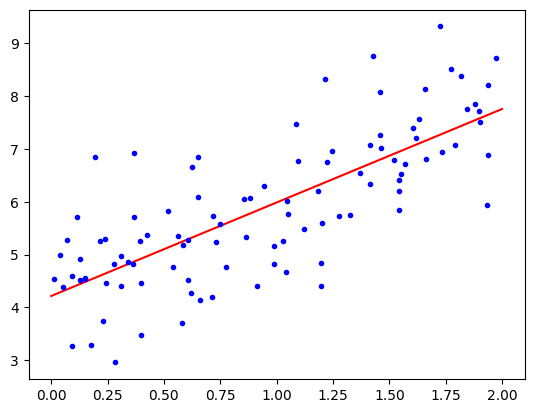

In [2]:
import numpy as np
from sklearn.preprocessing import add_dummy_feature
"""
sklearn.preprocessing.add_dummy_feature(X, value=1.0)
Augment dataset with an additional dummy feature.
This is useful for fitting an intercept term with implementations which cannot otherwise fit it directly.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.add_dummy_feature.html
"""

# new import 
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m ,1)
y = 4 + 2 * X + np.random.randn(m, 1)

"""
Understanding the Linear Model
In a linear regression setting, the relationship between X and Y is often modeled as:

Y = β₀ + β₁X + ε

Where:
β₀ (4): The intercept, representing the value of Y when X = 0.
β₁ (2): The slope of the line, representing the rate of change of Y with respect to X.
ε (random noise): Represents random variation or "noise" that is added to
make the data more realistic.
Chat GPT Example
"""

X_b = add_dummy_feature(X)
"""
Understand the purpose of X_b
The function sklearn.preprocessing.add_dummy_feature adds a column of constant values (typically 1.0)
to a feature matrix X. This dummy column is often used to account for the intercept term in a linear
regression model.

X= 
0.5
1.2
0.8

X b	=  
1 0.5
1 1.2
1 0.8
Chat GPT
"""

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
"""
numpy.linalg.inv
Compute the inverse of a matrix
https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

Matrix: a data structure composed of rows and columns
https://www.lenovo.com › outletus › glossary › matrix
"""

print("m", m)
print("X", X[:10])
print("y", y[:10])
print("X_b", X_b[:10])
print("theta_best", theta_best[:10])

X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
print("y_predict", y_predict)

# plot
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
[...]
plt.show()

In [3]:
# Perform linear regression using Sklearn
from sklearn.linear_model import LinearRegression
import numpy as np

# Seed data
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m ,1)
y = 4 + 2 * X + np.random.randn(m, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("lin_reg intercept", lin_reg.intercept_)
print("lin_reg.coef_", lin_reg.coef_)

# predict
X_new = np.array([[0],[2]])
print("predict", lin_reg.predict(X_new))

lin_reg intercept [4.21509616]
lin_reg.coef_ [[1.77011339]]
predict [[4.21509616]
 [7.75532293]]


> This function computes 𝛉, where is the pseudoinverse of X (specifically, the Moore–Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly.

> This approach is more efficient than computing the Normal equation, plus it handles edge cases nicely: indeed, the Normal equation may not work if the matrix X⊺X is not invertible (i.e., singular), such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

In [4]:
from sklearn.preprocessing import add_dummy_feature
import numpy as np

# Seed data
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m ,1)
y = 4 + 2 * X + np.random.randn(m, 1)

# Add dummy feature
X_b = add_dummy_feature(X)

print("pseudoinverse", np.linalg.pinv(X_b) @ y)

pseudoinverse [[4.21509616]
 [1.77011339]]


# Computational Complexity

> The Normal equation computes the inverse of X⊺ X...
>  if you double the number of features, you multiply the computation time by roughly 22.4 = 5.3 to 23 = 8.

> The SVD approach used by Scikit-Learn’s LinearRegression class is about O(n2). If you double the number of features, you multiply the computation time by roughly 4.

Both the Normal equation and the SVD approach get very slow when the number of features grows large.

> Once you have trained your linear regression model (using the Normal equation or any other algorithm), predictions are very fast.

# Gradient Descent

> Gradient descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function.

Example:
> Suppose you are lost in the mountains in a dense fog, and you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what gradient descent does.

> An important parameter in gradient descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time
> if the learning rate is too high, you might jump across the valley and end up on the other side

> Additionally, not all cost functions look like nice, regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrain, making convergence to the minimum difficult.

> This diagram also illustrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function (over the training set).

# Batch Gradient Descent

> To implement gradient descent, you need to compute the gradient of the cost function with regard to each model parameter θj. In other words, you need to calculate how much the cost function will change if you change θj just a little bit. This is called a partial derivative.

> Instead of computing these partial derivatives individually, you can use Equation 4-6 to compute them all in one go.

> This is why the algorithm is called batch gradient descent: it uses the whole batch of training data at every step (actually, full gradient descent would probably be a better name). As a result, it is terribly slow on very large training sets (we will look at some much faster gradient descent algorithms shortly).

> To find a good learning rate, you can use grid search (see Chapter 2).

> To find the optimal learning rate for a linear regression model using grid search, you essentially create a range of different learning rate values, train the model with each value, and then use cross-validation to identify the learning rate that produces the best performance on your validation set, effectively "searching" across a grid of potential learning rates to find the best one.
Google AI

In [5]:
from sklearn.preprocessing import add_dummy_feature
import numpy as np

"""
Each time a dataset passes through an algorithm, it is said to have completed an epoch.
Therefore, Epoch, in machine learning, refers to the one entire passing of training data
through the algorithm.
https://www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-epoch-in-machine-learning#:~:text=Each%20time%20a%20dataset%20passes,training%20data%20through%20the%20algorithm.
"""

# Seed data
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m ,1)
y = 4 + 2 * X + np.random.randn(m, 1)

# Add dummy feature
X_b = add_dummy_feature(X)

eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2,1) # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

print("theta", theta) # matches the normal equation exactly!

theta [[4.21509616]
 [1.77011339]]


> You may wonder how to set the number of epochs.

> A simple solution is to set a very large number of epochs but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—because this happens when gradient descent has (almost) reached the minimum.